# Ridge and Lasso Regression

The Ridge and Lasso regression models are regularized linear models which are a good way to reduce overfitting and to regularize the model: the less degrees of freedom it has, the harder it will be to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

## Ridge Regression
Ridge regression is a regularized version of linear regression. This forces the training algorithm not only to fit the data but also to keep the model weights as small as possible.

Note that the accrual term should only be added to the cost function during training. After you train the model, you want to use the unregulated performance measure to evaluate the performance of the model.

## Lasso Regression
Least absolute shrinkage and selection operator regression (usually just called lasso regression) is another regularized version of linear regression: just like peak regression, it adds a regularization term to the cost function. , but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings. filterwarnings('ignore')

In [2]:
# Reading the dataset

data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Removing the redundent column

data.drop(["Unnamed: 0"], axis=1, inplace=True)

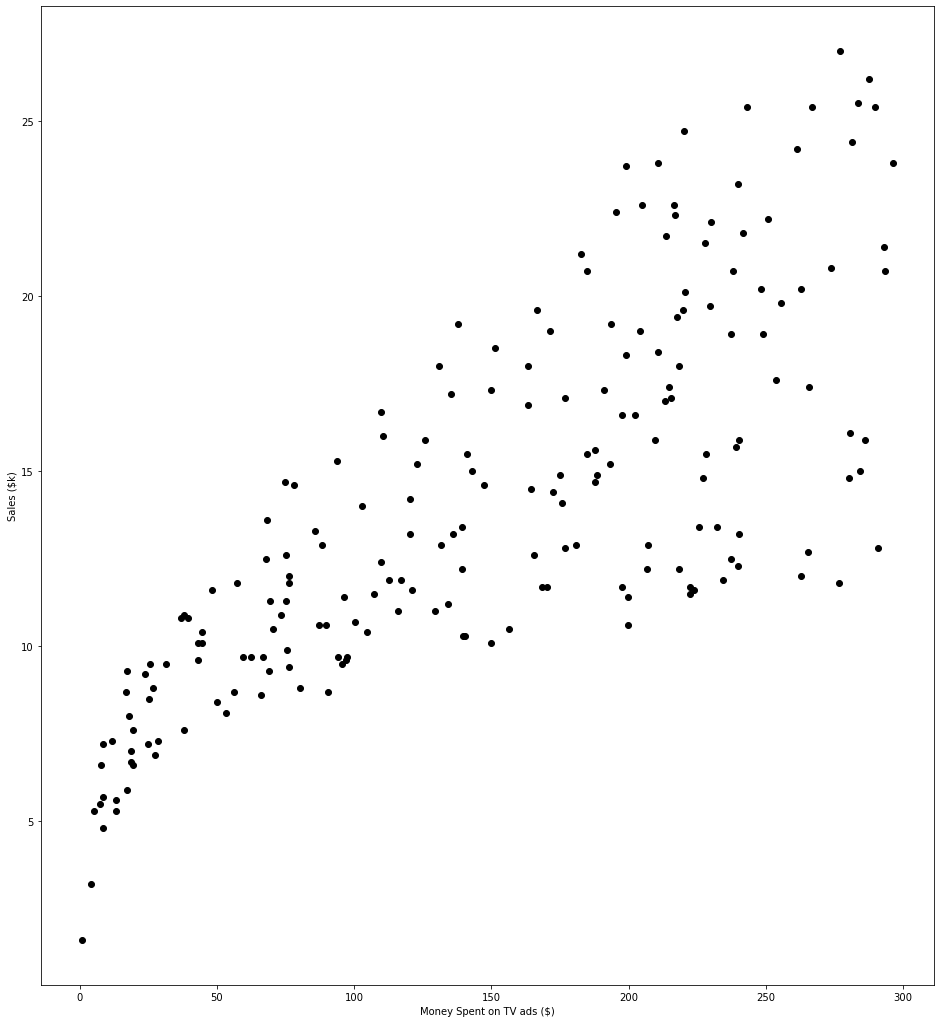

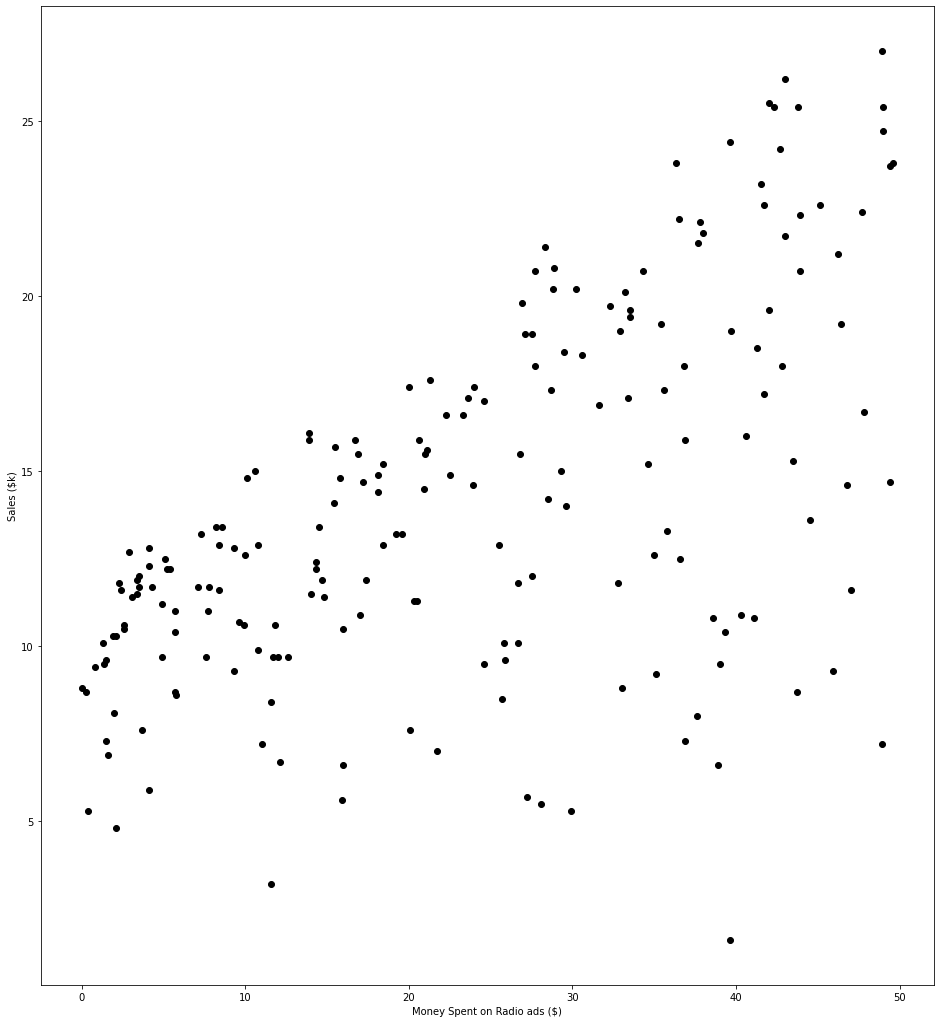

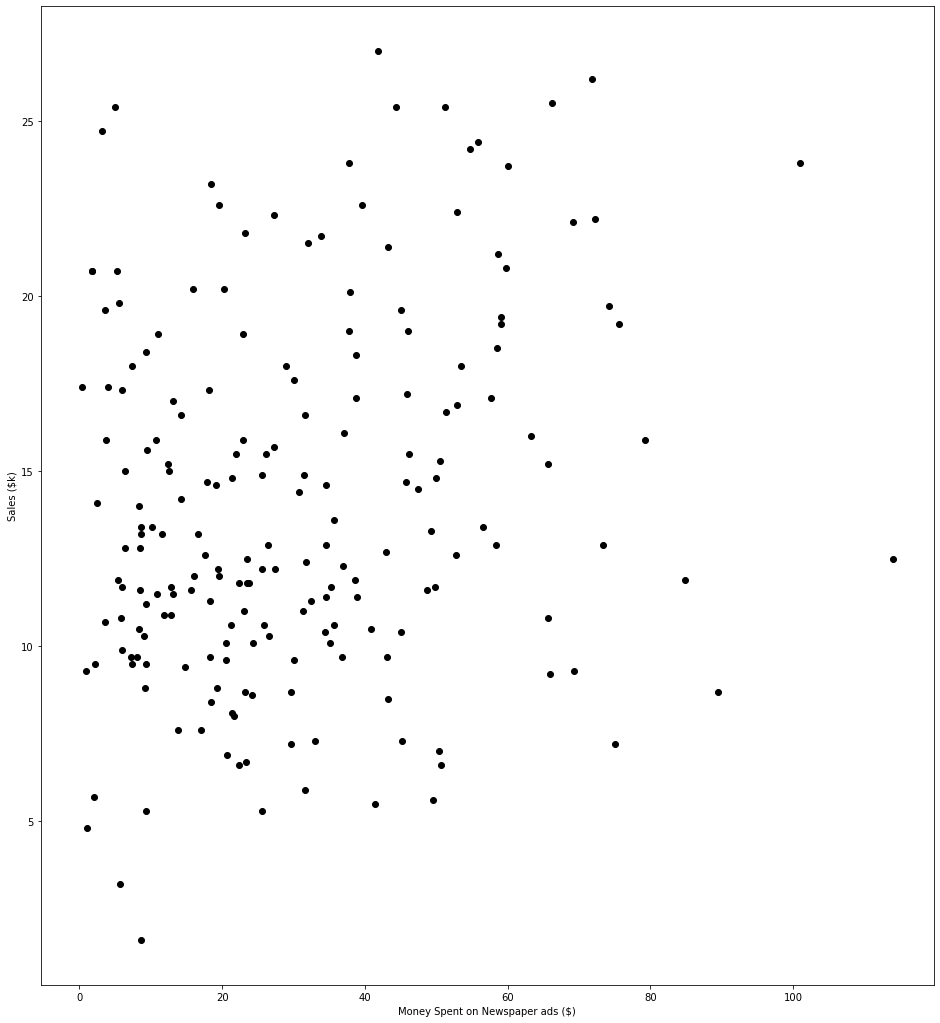

In [4]:
# 

def scatter_plot(feature, target):
    plt.figure(figsize=(16, 18))
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

scatter_plot("TV", "Sales")
scatter_plot("Radio", "Sales")
scatter_plot("Newspaper", "Sales")

## Linear Regression

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

xs = data.drop(["Sales"], axis=1)
y = data["Sales"].values.reshape(-1,1)
linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring="neg_mean_squared_error", cv=5)

mean_MSE = np.mean(MSE)
print(mean_MSE)

-3.07294659710021


## Ridge Regression

For the ridge regression algorithm, using GridSearchCV model provided by Scikit-learn, which will allow us to automatically perform the 5-fold cross-validation to find the optimal value of alpha.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [7]:
# best parameter and the best MSE

print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-3.072671338341143


## Lasso Regression

In [8]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(xs, y)

# best parameter and the best MSE

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-3.041405896751369


Here, lasso gave the best method of adjustment, with a regularization value of 1.